In [2]:
pip install pandas matplotlib seaborn numpy


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('Customer Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):
  if value==1:
    return "Yes"
  else:
    return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [ ]:
#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

<function matplotlib.pyplot.show(close=None, block=None)>

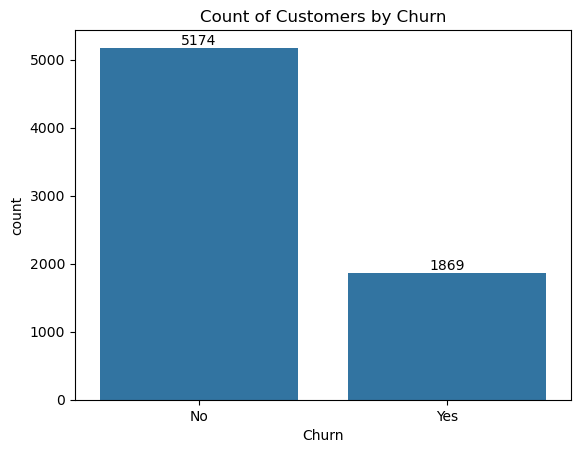

In [13]:
ax = sns.countplot(x = df['Churn'] , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show

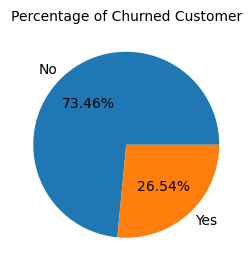

,Churn
Churn,
No,5174
Yes,1869


In [14]:
plt.figure(figsize= (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.title('Percentage of Churned Customer',fontsize = 10)
plt.show()
gb

In [ ]:
#from the given pie chart we can conclude that 26.54% of our customer have churned out
# now lets explore the reason behind it

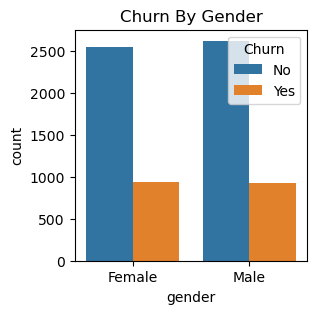

In [15]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df , hue = "Churn")
plt.title("Churn By Gender")
plt.show()

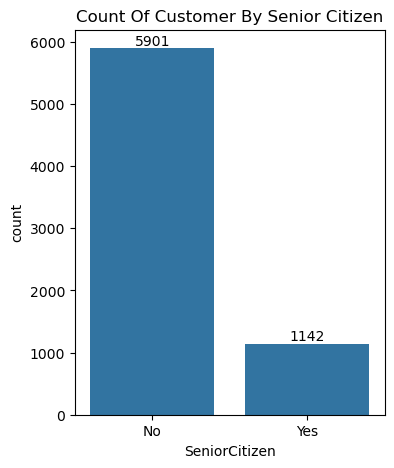

In [30]:
plt.figure(figsize = (4,5)) 
ax = sns.countplot(x = "SeniorCitizen", data = df) 
plt.title("Count Of Customer By Senior Citizen")
ax.bar_label(ax.containers[0])
plt.show()

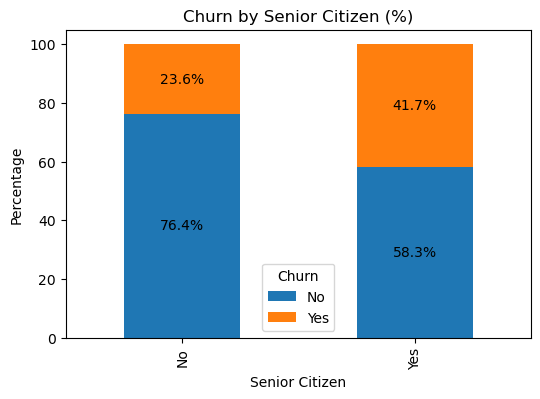

In [20]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert counts to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(6,4), color=['#1f77b4','#ff7f0e'])

# Add percentage labels on each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

plt.title('Churn by Senior Citizen (%)')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn')
plt.show()

#comparitively a greater percentage of people in senior citizen category have churned

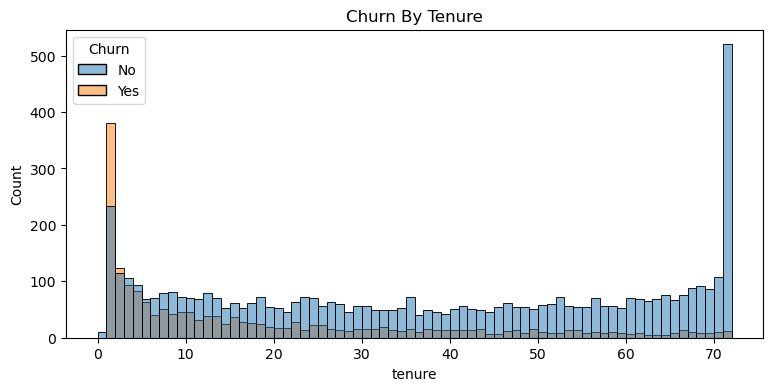

In [16]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df , bins = 72 , hue = "Churn")
plt.title("Churn By Tenure")
plt.show()

In [ ]:
#people who have used our services for long time  have stayed and people who have used our services for one or two month have churned

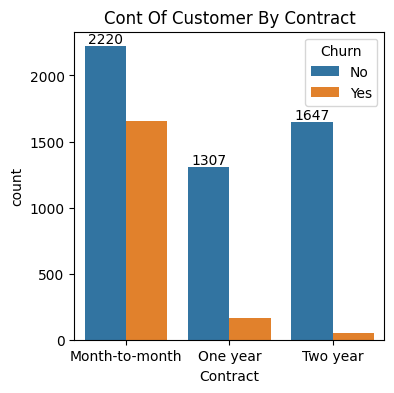

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Cont Of Customer By Contract")
plt.show()

In [ ]:
# people who have month to month contract have likely to churn then from those who have 1 or 2 years of contract

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

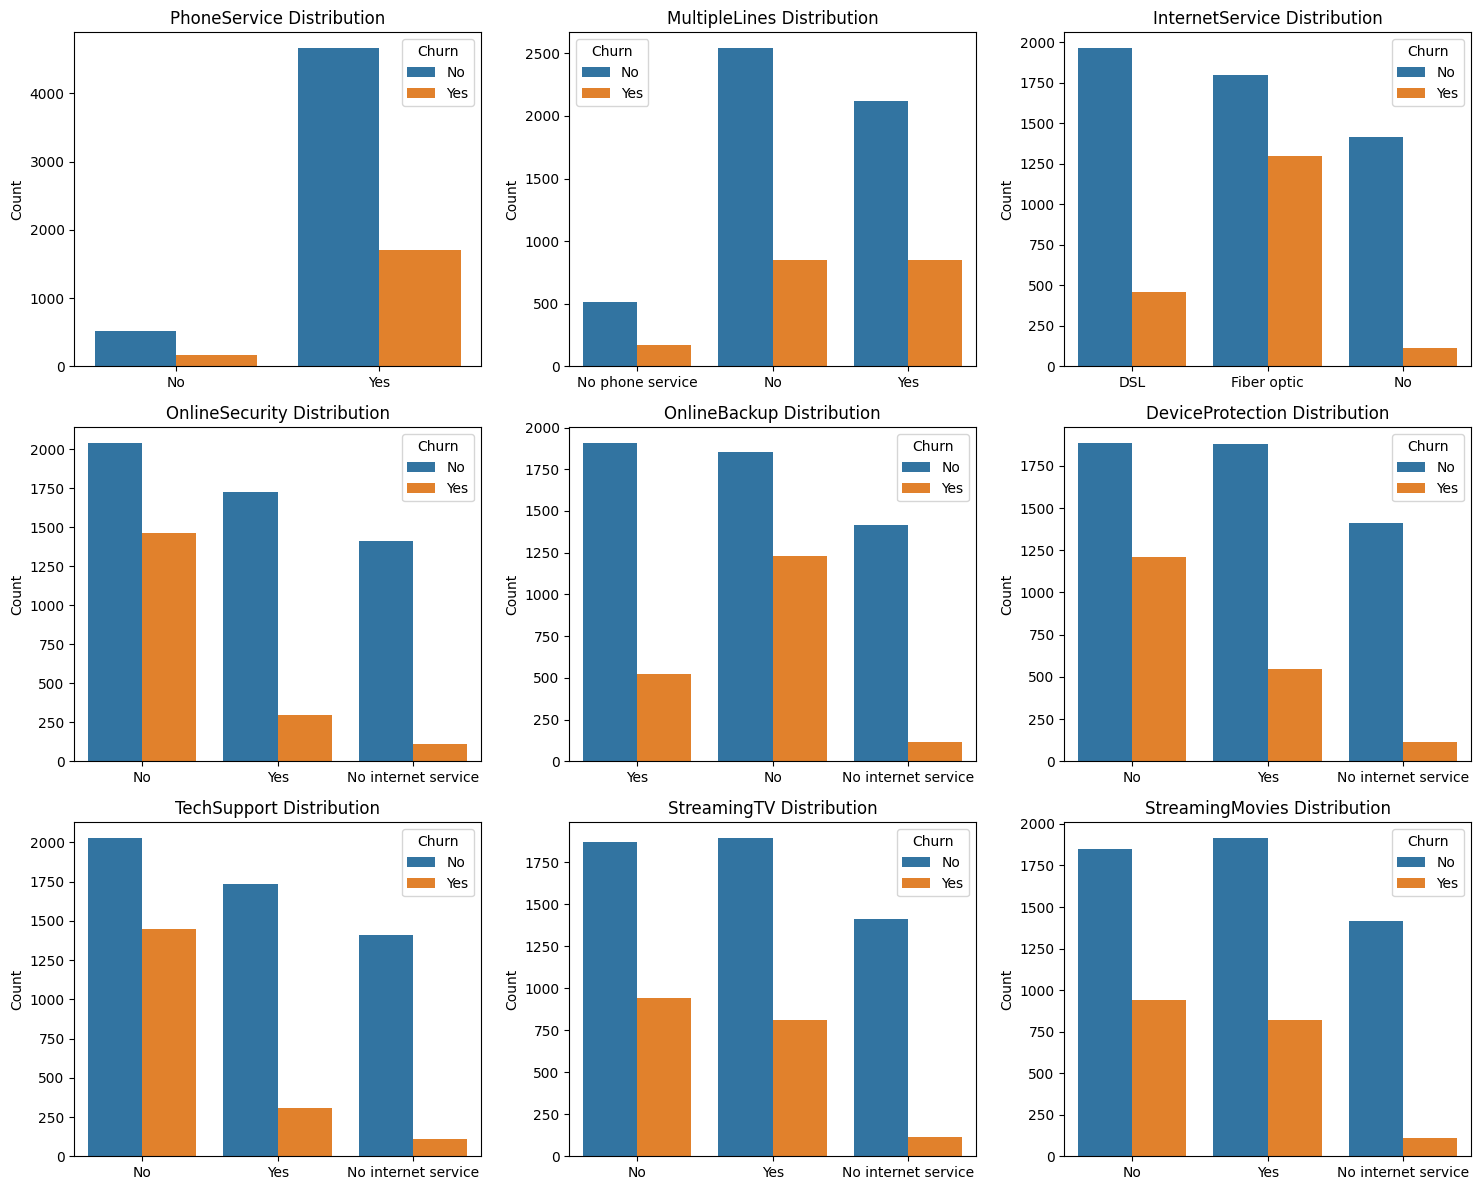

In [ ]:


cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# set up the subplot grid
n_cols = 3   # number of plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue =df["Churn"])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")


# remove unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#📞 PhoneService is common for almost all, so it doesn’t affect churn much.

#🌐 Fiber optic customers show higher churn than DSL.

#🔒 Lack of OnlineSecurity, TechSupport, and OnlineBackup strongly links to churn.

#🎬 Entertainment services (StreamingTV/Movies) have less impact on churn.

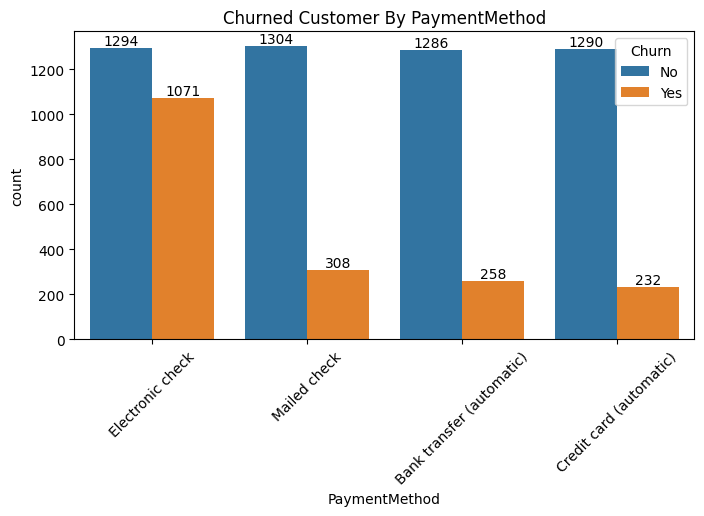

In [ ]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = "PaymentMethod", data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customer By PaymentMethod")
plt.show()

In [ ]:
#customer is likely to churn when he is using electronic check as payment method